# Requirements

In [22]:
# !pip install tqdm

import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exercises

## Rewrite the psuedo code of Monte Carlo ES as mentioned in Exercise 5.4. You must explain your code and why it is equivalent to the code provided in the book.

### Explanation

$G_{s, a, t}$ is the return (sum reward uptil episode termination) recieved after encountering state $s$ and taking action $a$ on it the $t^{th}$ time (we only consider the first encounter in an epsiode, later ecnounters in an episode are ignored) over the course of all the episodes. <br>
<br> 
$Q(s, a) = \frac{1}{n} . \sum_{k=1}^{n} G_{s,a,k} $ <br>
where $n$ is the last time action $a$ is taken on state $s$ in the episodes generaed by Monte Carlo. <br>
<br>
$Q(s, a)_t = \frac{1}{t} . \sum_{k=1}^{t} G_{s,a,k} $ <br>
<br>
$Q(s, a)_{t+1} = \frac{1}{t+1} . \sum_{k=1}^{t+1} G_{s,a,k} $ <br>
<br>
$\qquad\qquad\quad = \frac{1}{t+1} . [G_{s,a,k+1} + \sum_{k=1}^{t} G_{s,a,k}]$ <br>
<br>
$\qquad\qquad\quad = \frac{1}{t+1} . [G_{s,a,k+1} + \frac{1}{t+1}\sum_{k=1}^{t} G_{s,a,k}]$ <br>
<br>
$\qquad\qquad\quad = \frac{1}{t+1} . [G_{s,a,k+1} + t . \frac{1}{t} . \sum_{k=1}^{t} G_{s,a,k}]$ <br>
<br>
$\qquad\qquad\quad = \frac{1}{t+1} . [G_{s,a,k+1} + t . Q(s, a)_t]$ <br>
<br>
$\qquad\qquad\quad = Q(s, a)_t + \frac{1}{t+1} . [G_{s,a,k+1} - Q(s, a)_t]$ <br>

### Pseudocode

Initialize: <br>
$\qquad \pi(s) \in A(s)$ (arbitrarily), for all $s \in S$ <br>
$\qquad Q(s, a) \in \mathbb{R}$ (arbitrarily), for all $s \in S, a \in A(s)$ <br>
$\qquad Count(s, a) \leftarrow 2D\ list\ of\ zeros$, for all $s \in S, a \in A(s)$ <br>
Loop forever (for each episode): <br>
$\qquad$Choose $S_0 \in S, A_0 \in A(S_0)$ randomly such that all pairs have probability $> 0$ <br>
$\qquad$Generate an episode from $S_0,A_0$, following $\pi: S_0, A_0, R_1, ..., S_{T−1},A_{T−1},R_T$ <br>
$\qquad G \leftarrow 0$ <br>
$\qquad$Loop for each step of episode, $t = T−1, T−2, ..., 0:$ <br>
$\qquad \qquad G \leftarrow \gamma G + R_{t+1}$ <br>
$\qquad \qquad$Unless the pair $S_t,A_t$ appears in $S_0, A_0, S_1, A_1, ..., S_{t−1}, A_{t−1}:$ <br>
$\qquad \qquad \qquad Q(S_t,A_t) \leftarrow Q(S_t, A_t) + [G - Q(S_t, A_t)]\ /\ [Count(S_t, A_t)+1]$ <br>
$\qquad \qquad \qquad Count(S_t,A_t) \leftarrow Count(S_t, A_t) + 1$ <br>
$\qquad \qquad \qquad \pi(S_t) \leftarrow argmax_a Q(S_t, a)$

## Draw the backup diagram asked for in exercise 5.3.

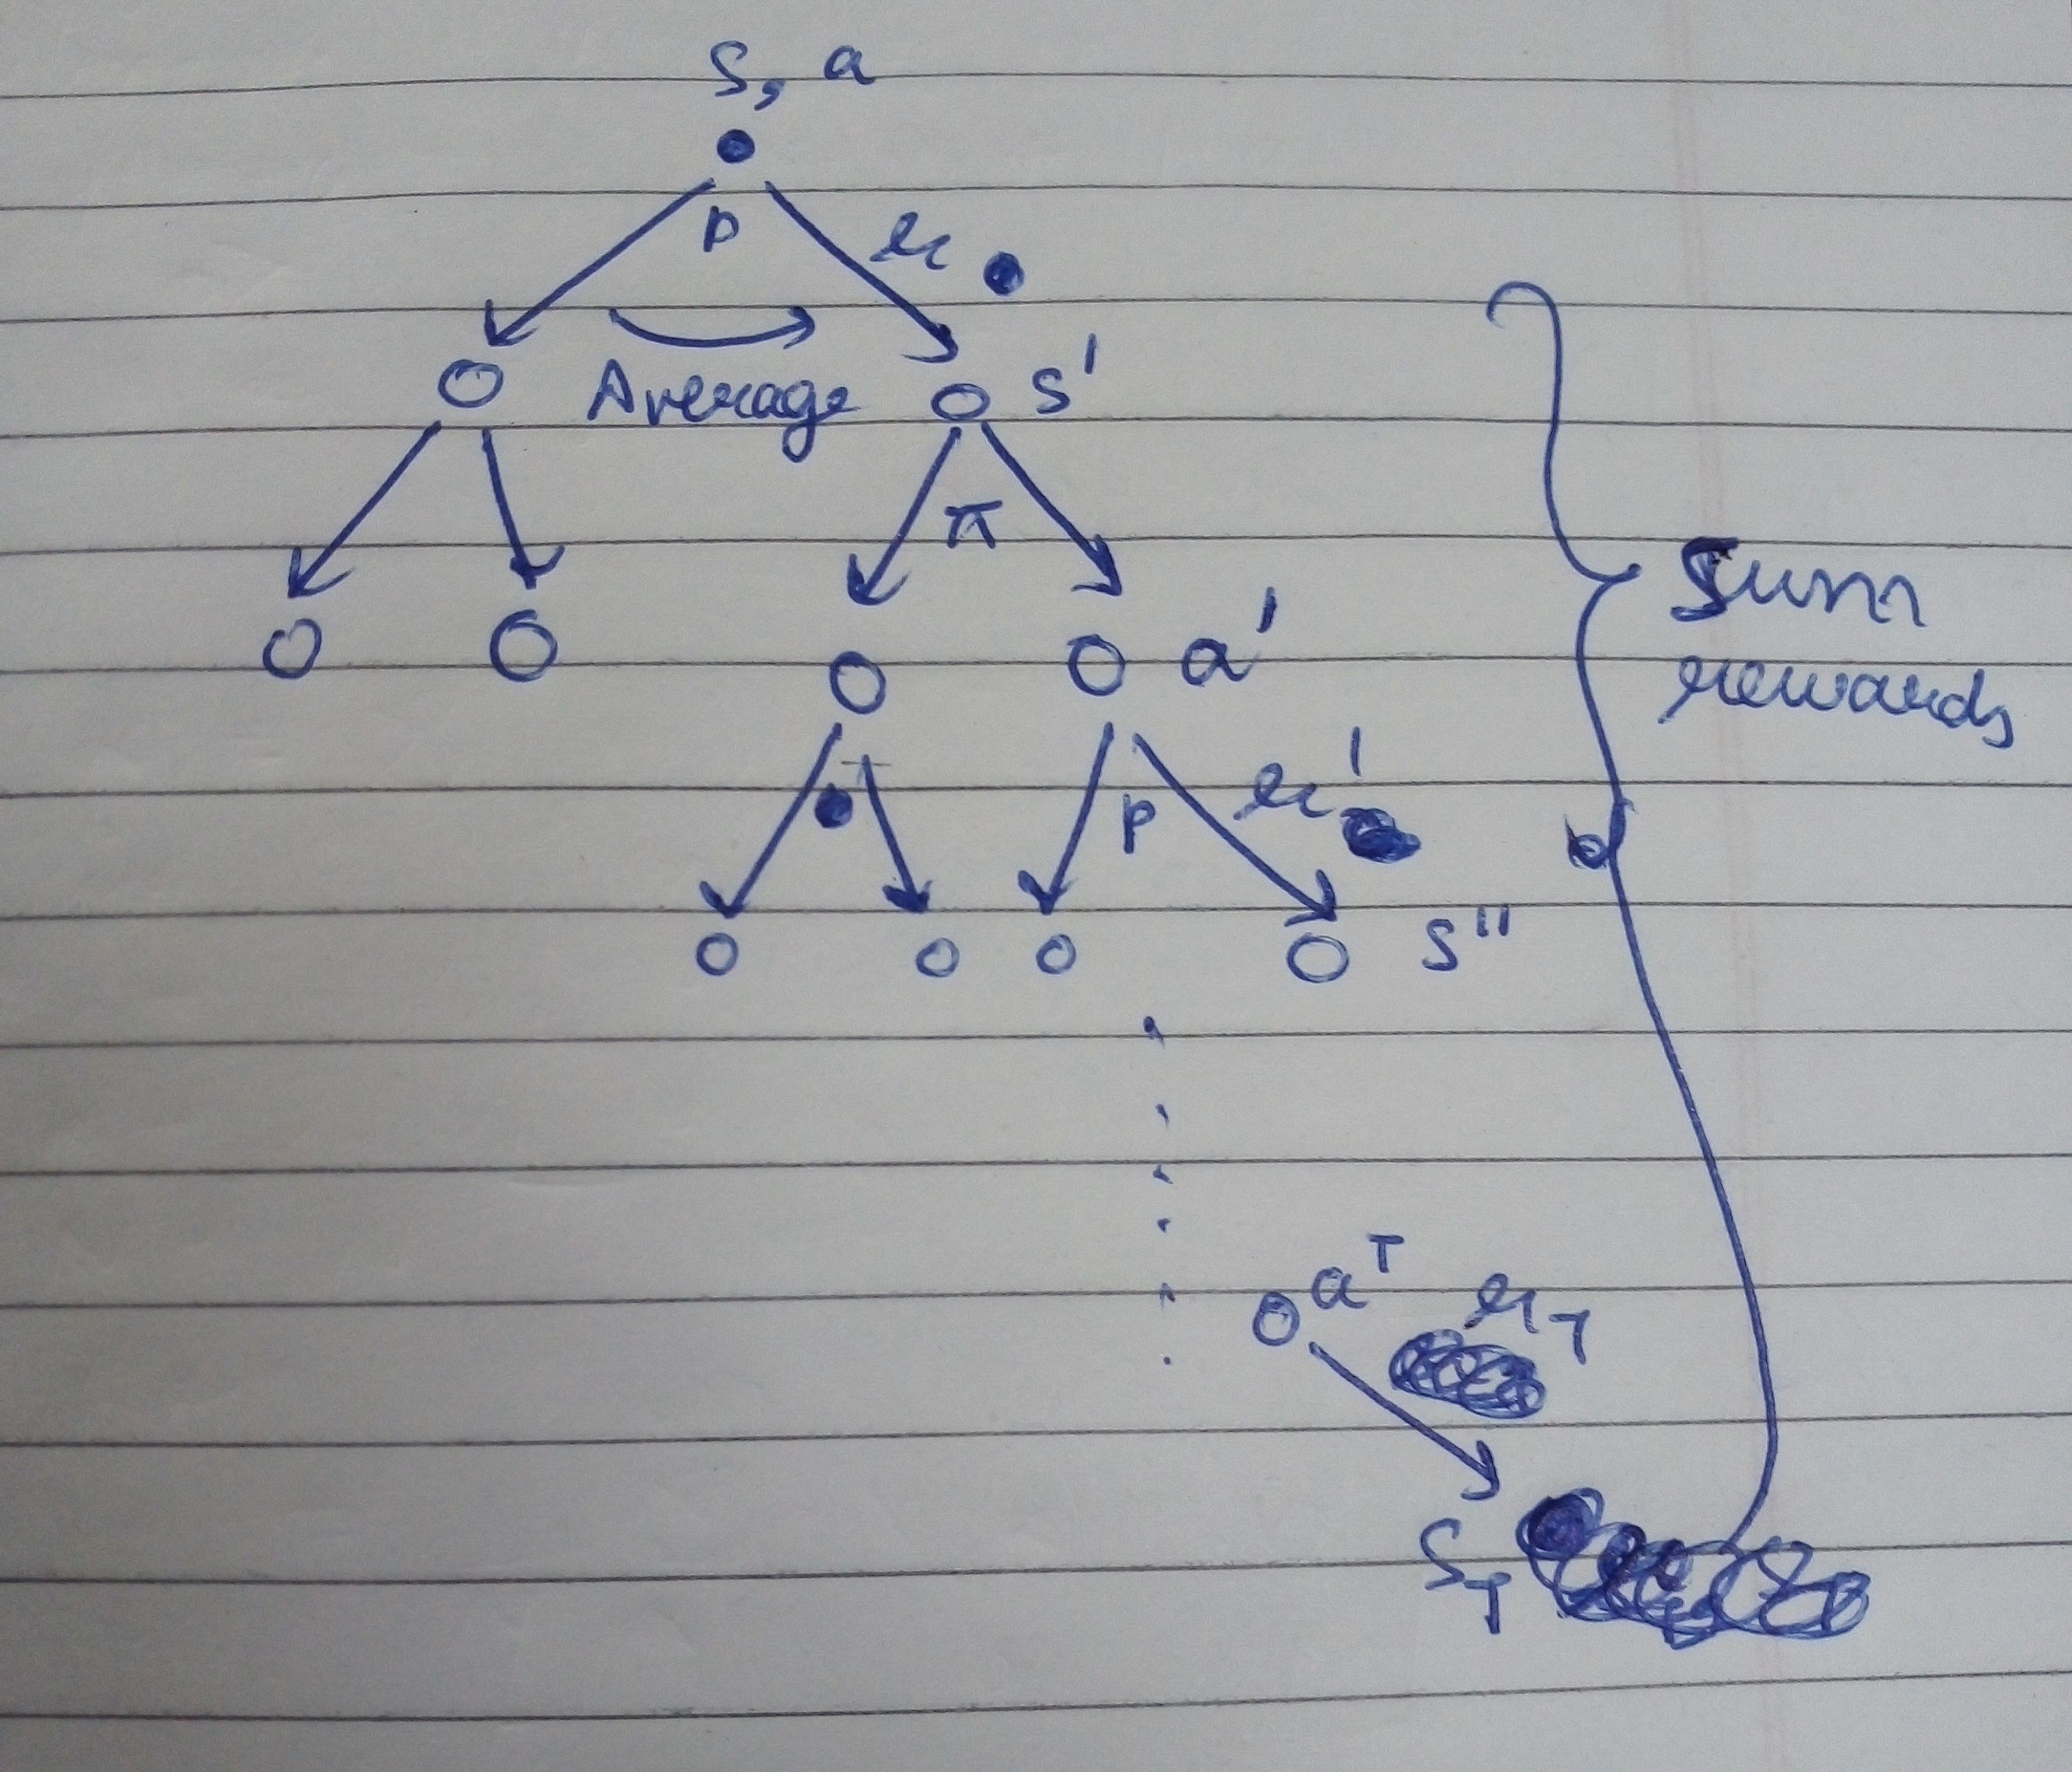

In [121]:
from IPython.display import Image
Image(filename='backup_diag.jpg') 

## Solve exercise 5.6.

$\large{\rho_{t:T-1} \doteq \prod_{k=t}^{T-1}\frac{\pi(A_k|S_k)}{b(A_k|S_k)}}$ <br>
<br>
$q_b(s, a) = \mathbb{E}_b[G_t | S_t=s, A_t=a]$ <br>
<br>
$q_\pi(s, a) = \mathbb{E}_\pi[\rho_{t:T-1} G_t | S_t=s, A_t=a]$ <br>
<br>
$\mathfrak{T}(s, a)$ is the set of all time steps when state $s$ is visited and action $a$ is taken on it for an every-visit method. <br> 
$\mathfrak{T}(s, a)$ is the set of all time steps that were first visits to $s$ when action $a$ is taken on it within their episodes, in case of first-visit Monte Carlo. <br>
$T(t)$ is the time of termination of the episode in which time $t$ occurs. <br> 
$G_t$ is the return after $t$ uptil $T(t)$. <br>
<br>
$\large{Q(s, a) \doteq \frac{\sum_{t\in\mathfrak{T}(s,a)}\rho_{t:T-1} G_t}{|\mathfrak{T}(s, a)|}}$ <br>
<br>
$\large{Q(s, a) \doteq \frac{\sum_{t\in\mathfrak{T}(s,a)}\rho_{t:T-1} G_t}{\sum_{t\in\mathfrak{T}(s,a)}\rho_{t:T-1}}}$ <br>

## Solve the blackjack game and generate figures 5.1, 5.2, and 5.3. Submit your figures and code. You must explain your code.

In [ ]:
#Sum of player's cards' can be 12 to 21
n_ps = 10
#Dealer's visible card can be 1 to 10
n_d = 10 
#Usable and no usable Ace
n_ace = 2 
#Hit for dealer and player, as stick for player is hit for dealer and stick for dealer is termination
n_a = 2 
#Bust criteria
max_sum = 21 
#Stick Criteria
p_stick = 20
d_stick = 17

#number of cards
n_c = 10
#probabilities of different cards
p = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4])/13

#State is (player sum, dealer card, usability of ace)
#Player's sum 12 is mapped to 0, 13->2 and so on
ps_map = 12
#Dealer Ace is mapped to 0, 2->1 and so on
d_map = 1
#0 means usable Ace, and 1 is Not usable ace
#0 means hit for player; 1 -> hit for dealer

### Policy Prediction

In [91]:
def transit(ps, d, ace, d_ace, a):
    ps1, d1, ace1, d_ace1, r = ps, d, ace, d_ace, 0
    
    #Player hits
    if a == 0:
        #Next card
        card = np.random.choice(n_c, p=p) + 1
        ps1 += card
        #Player sum exceeds max_sum
        if ps1 + ps_map > max_sum:
            #Usable ace
            if ace == 0:
                ps1 -= 10
                #Ace not usable
                ace1 = 1
            #Bust
            else:
                ps1 = (max_sum - ps_map) + 1
                #lost the game
                r = -1
        
    elif a == 1:
        #Next card
        card = np.random.choice(n_c, p=p) + 1
        d1 += card
        #Player sum exceeds max_sum
        if d1 + d_map > max_sum:
            if d_ace:
                d1 -= 10
                d_ace1 = False
            else:
                d1 = (max_sum - d_map) + 1  
        
        if d1 + d_map > d_stick:
            #Equal sums
            if d1 + d_map == ps1 + ps_map:
                r = 0
            #Only dealer bust
            elif d1 + d_map > max_sum:
                r = 1
            #None bust
            else :
                r = np.sign((ps1+ps_map) - (d1+d_map))
                
    return ps1, d1, ace1, d_ace1, r

def gen_eps(ps, d, ace):
    #Episode
    eps = []
    terminate = False
    d_ace = d == 0
    ds = d + 10
    while not terminate:
        ep = [[ps, d, ds, ace]]
        #Player hits
        if ps + ps_map < p_stick:
            a = 0
            ep.append(a)
            ps, ds, ace, d_ace, r = transit(ps, ds, ace, d_ace, a)
            ep.append(r)
            eps.append(ep)
        #Player sticks
        else:
            #Player Bust
            if ps + ps_map > max_sum:
                terminate = True
            #Dealer hits
            if ds + d_map < d_stick:
                a = 1
                ep.append(a)
                ps, ds, ace, d_ace, r = transit(ps, ds, ace, d_ace, a)
                ep.append(r)
                eps.append(ep)
            #Dealer Sticks
            else:
                terminate = True
    return eps

V = np.zeros((n_ps+1, n_d+1, n_ace))
Count = np.zeros((n_ps, n_d, n_ace)) 

n_eps = 500000
mid_eps = 9999
V_mid = 0

for e in tqdm(range(n_eps)):
    #Random starting point selection
    ps, d, ace = np.random.randint(n_ps), np.random.randint(n_d), np.random.randint(n_ace)
    #Generate Episode
    eps = gen_eps(ps, d, ace)
    #Episode Length
    T = len(eps)
    #Return
    G = 0
    for t in range(T-1, -1, -1):
        (ps, d, ds, ace), a, r = eps[t]
        if ps + ps_map > max_sum:
            continue
        G += r
        V[ps, d, ace] += (G - V[ps, d, ace])/(Count[ps, d, ace] + 1)
        Count[ps, d, ace] += 1
    
    if e == mid_eps:
        V_mid = np.copy(V)

100%|██████████| 500000/500000 [01:05<00:00, 7667.19it/s]


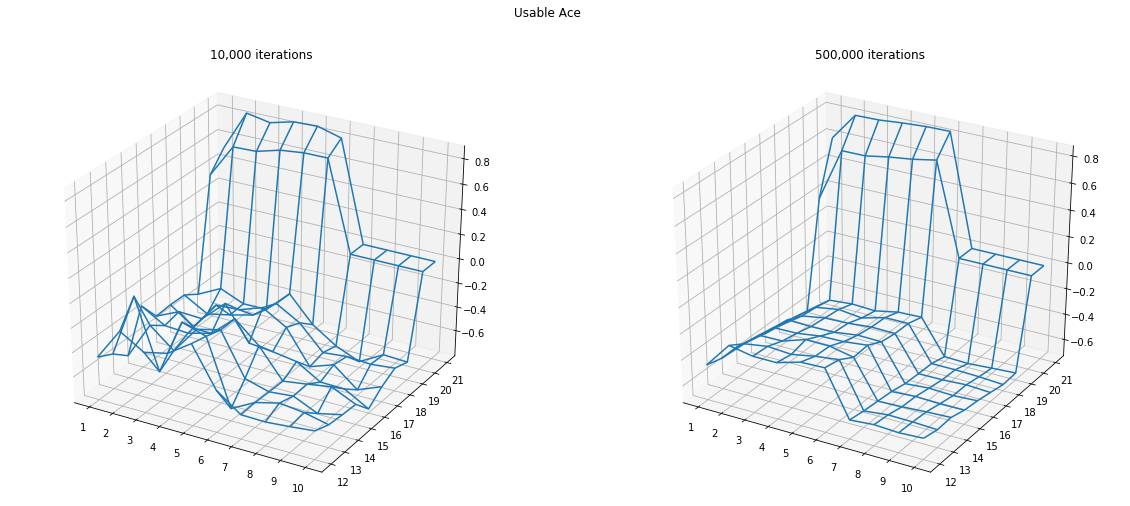

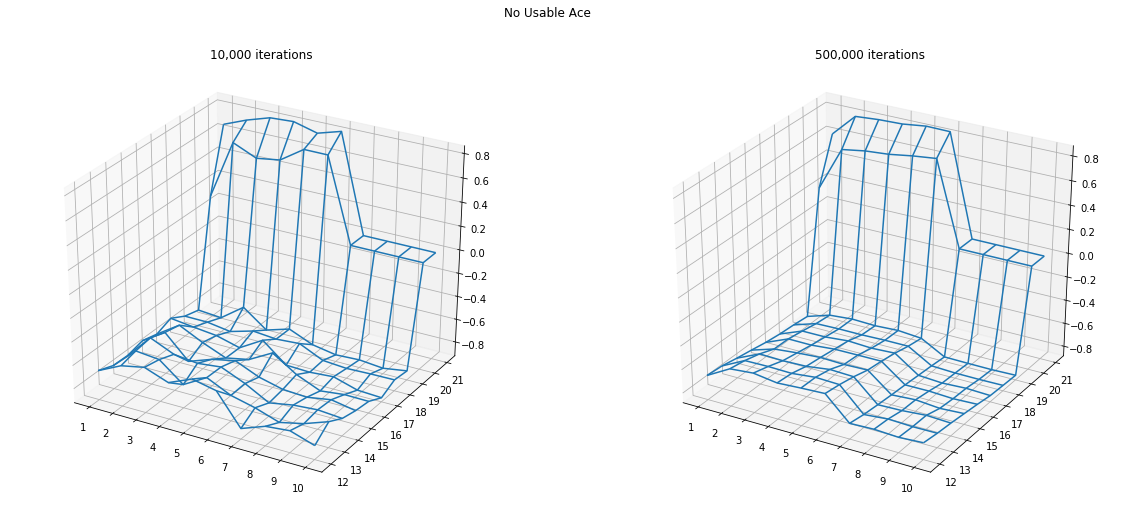

In [92]:
xv, yv = np.meshgrid(np.arange(10)+12, np.arange(10)+1, indexing='ij')

fig = plt.figure(figsize=(20, 8))
fig.suptitle('Usable Ace')
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(yv, xv, V_mid[:-1, :-1, 0])
plt.xticks(np.arange(10)+d_map)
plt.yticks(np.arange(10)+ps_map)
# ax.set_zticks([np.amin(V_mid[:, :, 0]), 0, np.amax(V_mid[:, :, 0])])
ax.title.set_text('10,000 iterations')

ax = fig.add_subplot(122, projection='3d')
ax.plot_wireframe(yv, xv, V[:-1, :-1, 0])
plt.xticks(np.arange(10)+d_map)
plt.yticks(np.arange(10)+ps_map)
# ax.set_zticks([np.amin(V[:, :, 0]), 0, np.amax(V[:, :, 0])])
ax.title.set_text('500,000 iterations')

fig = plt.figure(figsize=(20, 8))
fig.suptitle('No Usable Ace')
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(yv, xv, V_mid[:-1, :-1, 1])
plt.xticks(np.arange(10)+d_map)
plt.yticks(np.arange(10)+ps_map)
# ax.set_zticks([np.amin(V_mid[:, :, 1]), 0, np.amax(V_mid[:, :, 1])])
ax.title.set_text('10,000 iterations')

ax = fig.add_subplot(122, projection='3d')
ax.plot_wireframe(yv, xv, V[:-1, :-1, 1])
plt.xticks(np.arange(10)+d_map)
plt.yticks(np.arange(10)+ps_map)
# ax.set_zticks([np.amin(V[:, :, 1]), 0, np.amax(V[:, :, 1])])
ax.title.set_text('500,000 iterations')


### Policy Control

In [98]:
def gen_eps_es(ps, d, ace, a):
    #Episode
    eps = []
    terminate = False
    d_ace = d == 0
    ds = d + 10
    while not terminate:
        ep = [[ps, d, ds, ace]]
        #Player hits
        if a == 0:
            ep.append(a)
            ps, ds, ace, d_ace, r = transit(ps, ds, ace, d_ace, a)
            ep.append(r)
            eps.append(ep)
        #Player sticks
        else:
            #Player Bust
            if ps + ps_map > max_sum:
                terminate = True
            #Dealer hits
            if ds + d_map < d_stick:
                a = 1
                ep.append(a)
                ps, ds, ace, d_ace, r = transit(ps, ds, ace, d_ace, a)
                ep.append(r)
                eps.append(ep)
            #Dealer Sticks
            else:
                terminate = True
    return eps

pi = np.zeros((n_ps, n_d, n_ace))
Q = np.zeros((n_ps+1, n_d+1, n_ace))
Q = np.zeros((n_ps+1, n_d+1, n_ace, n_a))
Count_Q = np.zeros((n_ps, n_d, n_ace, n_a)) 
Count_V = np.zeros((n_ps, n_d, n_ace)) 

n_eps = 500000
for e in tqdm(range(n_eps)):
    #Random starting point selection
    ps, d, ace, a = np.random.randint(n_ps), np.random.randint(n_d), np.random.randint(n_ace), np.random.randint(n_a)
    #Generate Episode
    eps = gen_eps(ps, d, ace)
    #Episode Length
    T = len(eps)
    #Return
    G = 0
    for t in range(T-1, -1, -1):
        (ps, d, ds, ace), a, r = eps[t]
        if ps + ps_map > max_sum:
            continue
        G += r
        V[ps, d, ace] += (G - V[ps, d, ace])/(Count_V[ps, d, ace] + 1)
        Count_V[ps, d, ace] += 1
        Q[ps, d, ace, a] += (G - Q[ps, d, ace, a])/(Count_Q[ps, d, ace, a] + 1)
        Count_Q[ps, d, ace, a] += 1
        pi[ps, d, ace] = np.argmax(Q[ps, d, ace])

100%|██████████| 500000/500000 [01:06<00:00, 7559.85it/s]


([<matplotlib.axis.XTick at 0x7fc8bc3c33c8>,
 <a list of 10 Text yticklabel objects>)

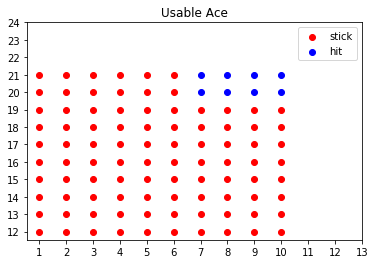

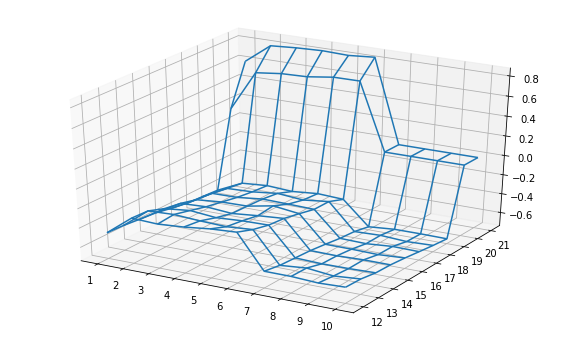

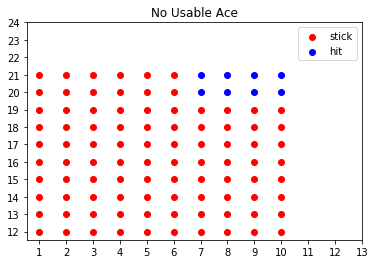

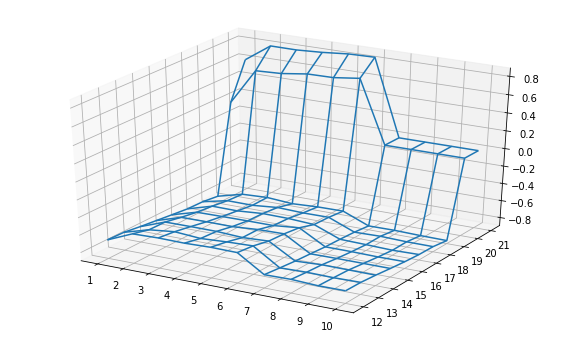

In [120]:
xv, yv = np.meshgrid(np.arange(10)+12, np.arange(10)+1, indexing='ij')

fig = plt.figure()
x, y = np.nonzero(pi[:, :, 0])
plt.scatter(y+d_map, x+ps_map, c='r', label='stick')
x, y = np.nonzero(pi[:, :, 0] == 0)
plt.scatter(y+d_map, x+ps_map, c='b', label='hit')
plt.xticks(np.arange(13)+d_map)
plt.yticks(np.arange(13)+ps_map)
plt.legend()
plt.title('Usable Ace')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(yv, xv, V[:-1, :-1, 0])
plt.xticks(np.arange(10)+d_map)
plt.yticks(np.arange(10)+ps_map)

fig = plt.figure()
x, y = np.nonzero(pi[:, :, 1])
plt.scatter(y+d_map, x+ps_map, c='r', label='stick')
x, y = np.nonzero(pi[:, :, 1] == 0)
plt.scatter(y+d_map, x+ps_map, c='b', label='hit')
plt.xticks(np.arange(13)+d_map)
plt.yticks(np.arange(13)+ps_map)
plt.legend()
plt.title('No Usable Ace')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(yv, xv, V[:-1, :-1, 1])
plt.xticks(np.arange(10)+d_map)
plt.yticks(np.arange(10)+ps_map)

## Solve exercise 6.2.

## Write the necessary code and generate the figures in Example 6.2. Answer the related questions asked in exercises 6.3, 6.4, and 6.5.

### Exercise 6.3
<b>From the results shown in the left graph of the random walk example it appears that the first episode results in a change in only V (A). What does this tell you about what happened on the first episode? Why was only the estimate for this one state changed? By exactly how much was it changed?</b>

### Exercise 6.4
<b>The specific results shown in the right graph of the random walk example are dependent on the value of the step-size parameter, $\alpha$. Do you think the conclusions about which algorithm is better would be affected if a wider range of $\alpha$ values were used? Is there a different, fixed value of $\alpha$ at which either algorithm would have performed
significantly better than shown? Why or why not?</b>

### Exercise 6.5
<b>In the right graph of the random walk example, the RMS error of the TD method seems to go down and then up again, particularly at high $\alpha$’s. What could have caused this? Do you think this always occurs, or might it be a function of how the approximate value function was initialized?</b>

In the example explained the intial updates of TD would be better because we already have a godd estimate from the old building we just need to improve upon our inter-building estimate. While in Monte Carlo we'd have to start all over again and generate full episodes and then update. 

## Write the code and generate the figure that compares the sum of rewards during episodes when using Q-learning and SARSA.

### Q-learning

### SARSA

### Comparison

## Solve Exercise 6.12.
<b>Suppose action selection is greedy. Is Q-learning then exactly the same algorithm as Sarsa? Will they make exactly the same action selections and weight updates?</b>

No. Even if action selection is greedy, SARSA has stochastic action selection with highest probability of the greedy action, so, though with low probability, it still may choose the non-greedy aciton, while Q-learning with greedy action selection will deterministically always choose the greedy action. Since they choose different actions they'll have different weight updates.  